In [ ]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Download required NLTK resources
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baqir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#Step1 : load the data

data = pd.read_csv(r"D:\dataset_of_project\news_headlines\news.csv")
df = pd.DataFrame(data)

In [24]:
# %% Step 2: Count of Sentiment Categories
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
NEGATIVE    217443
POSITIVE    210039
Name: count, dtype: int64


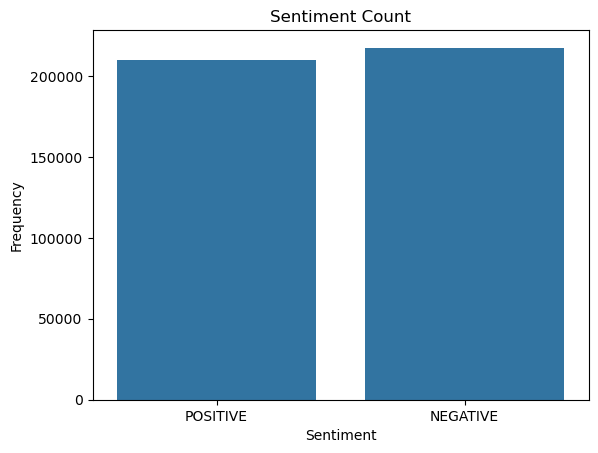

In [25]:
# %% Step 3: Visualize Sentiment Distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()


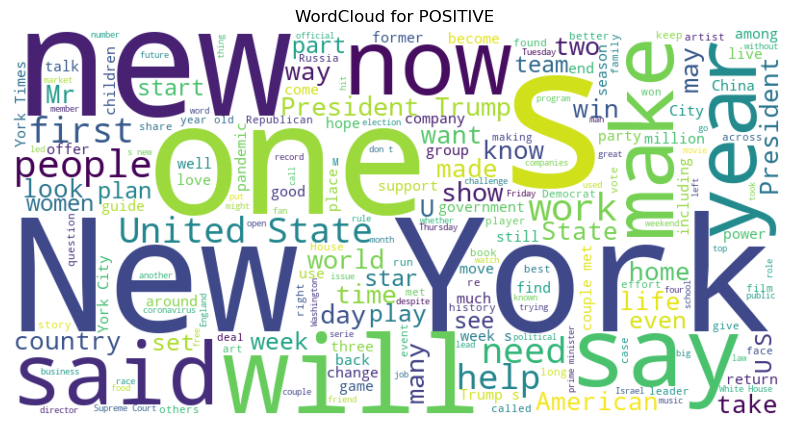

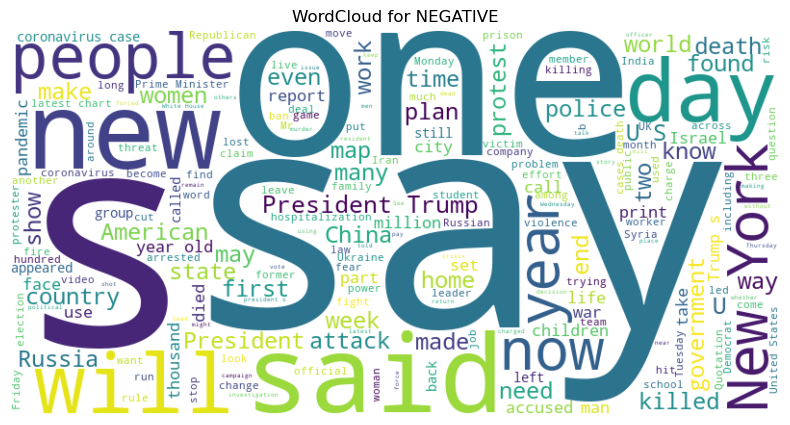

In [26]:
# %% Step 4: Generate WordClouds for Each Sentiment
def generate_wordcloud(data, sentiment):
    text = " ".join(data[data['sentiment'] == sentiment]['news'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment}")
    plt.show()

generate_wordcloud(df, 'POSITIVE')
generate_wordcloud(df, 'NEGATIVE')


In [27]:
# %% Step 5: Feature Extraction Using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['news'].astype(str))
y = df['sentiment']


In [28]:
# %% Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (341985, 109731), Test shape: (85497, 109731)


In [29]:
# %% Step 7: Train Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
print("Model trained.")


Model trained.


In [30]:
# %% Step 8: Evaluate the Model
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[34129  9444]
 [ 8975 32949]]

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.78      0.79     43573
    POSITIVE       0.78      0.79      0.78     41924

    accuracy                           0.78     85497
   macro avg       0.78      0.78      0.78     85497
weighted avg       0.78      0.78      0.78     85497



In [31]:
# %% Step 11: Predict Sentiment for New Headline
def predict_sentiment(text):
    transformed = vectorizer.transform([text])
    return model.predict(transformed)[0]

sample = "The economy is expected to crashed significantly this year."
print(f"Predicted Sentiment: {predict_sentiment(sample)}")

Predicted Sentiment: NEGATIVE


In [32]:
import joblib

# Save model
joblib.dump(model, "sentiment_model.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']